<a href="https://colab.research.google.com/github/ilahi22r/detecting_coherent_structures/blob/main/eulerian_velocity_fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
#for plotting inline in a notebook
%matplotlib inline
import matplotlib.pyplot as plt
import random
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from operator import itemgetter, attrgetter
import math

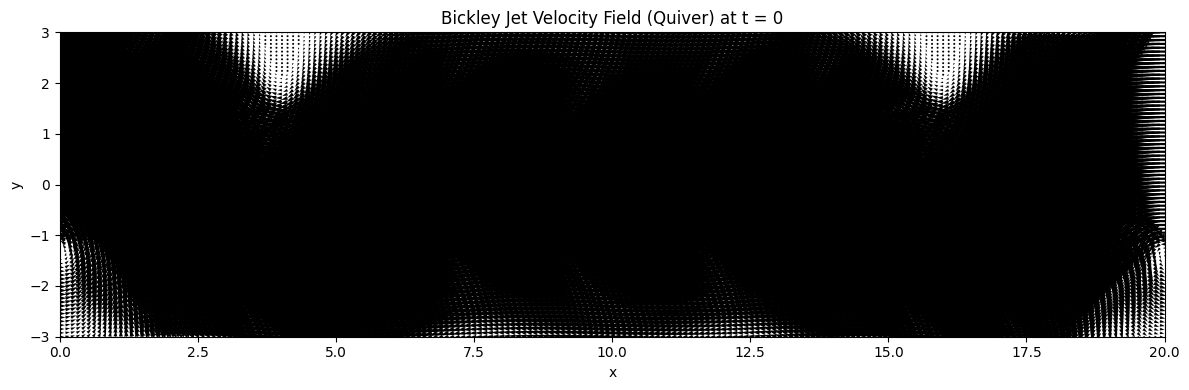

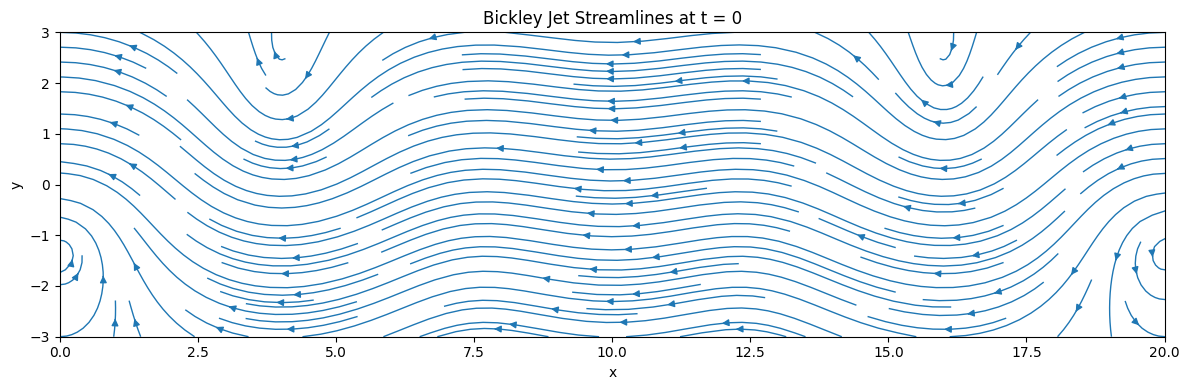

In [5]:
"""
Bickley Jet Velocity Field Generator
------------------------------------

This script computes and visualizes the Eulerian velocity field (u(x,y,t), v(x,y,t))
of the canonical Bickley Jet model used extensively in coherent structure and
Lagrangian transport studies:

    A. Hadjighasem et al., "A critical comparison of Lagrangian methods for
    coherent structure detection," Chaos 27, 053104 (2017).

The script:

1. Defines the Bickley Jet parameters and time-dependent velocity model.
2. Generates a 2D spatial grid over the same domain used for trajectory integration.
3. Evaluates the velocity field at a user-specified time t.
4. Produces both a quiver plot and a streamline plot for visualization.

This file contains only the Eulerian velocity-field generator
and is intended to be used alongside scripts that compute trajectories.
"""

import numpy as np
import matplotlib.pyplot as plt


# ---------------------------------------------------------------------
# Bickley Jet velocity field (Eulerian)
# ---------------------------------------------------------------------

def BickleyJet_velocity_field(X, Y, t, params):
    """
    Computes the Eulerian velocity field (u, v) for the Bickley Jet at grid points (X, Y)
    and at time t.
    """
    U, L, r0, k1, k2, k3, e1, e2, e3, c3, c2, c1 = params

    # Base zonal jet
    U0 = -U * (1 - np.tanh(Y/L)**2)
    V0 = 0

    # Perturbation modes
    sx1 = e1 * np.cos(k1 * (X + c1 * t))
    sx2 = e2 * np.cos(k2 * (X + c2 * t))
    sx3 = e3 * np.cos(k3 * (X + c3 * t))

    U1 = ((-2 * U * np.tanh(Y/L)) / (np.cosh(Y/L)**2)) * (sx1 + sx2 + sx3)

    sy1 = e1 * k1 * np.sin(k1 * (X + c1 * t))
    sy2 = e2 * k2 * np.sin(k2 * (X + c2 * t))
    sy3 = e3 * k3 * np.sin(k3 * (X + c3 * t))

    V1 = (U * L / (np.cosh(Y/L)**2)) * (sy1 + sy2 + sy3)

    u = U0 + U1
    v = V0 + V1

    return u, v


# ---------------------------------------------------------------------
# Parameter definitions (same as in your trajectory script)
# ---------------------------------------------------------------------

U = (62.66 * 60 * 60 * 24) / 10**6   # Mm/day
L = 1.77                             # Mm
r0 = 6.371000                        # Mm

k1 = 2 / r0
k2 = 4 / r0
k3 = 6 / r0

e1 = 0.075
e2 = 0.4
e3 = 0.3

c3 = 0.461 * U
c2 = 0.205 * U
c1 = c3 + ((np.sqrt(5) - 1) / 2) * (k2 / k1) * (c2 - c3)

params = [U, L, r0, k1, k2, k3, e1, e2, e3, c3, c2, c1]


# ---------------------------------------------------------------------
# Domain (must be consistent with your trajectory script)
# ---------------------------------------------------------------------

# Original Bickley Jet x-domain
xBound = [0, np.pi * r0]

# Example y-domain (use what you're using in your main script)
yBound = [-3, 3]

# Grid resolution
Nx, Ny = 200, 80
x = np.linspace(xBound[0], xBound[1], Nx)
y = np.linspace(yBound[0], yBound[1], Ny)
X, Y = np.meshgrid(x, y)


# ---------------------------------------------------------------------
# Evaluate the velocity field at a chosen time
# ---------------------------------------------------------------------

t_eval = 0  # days
u, v = BickleyJet_velocity_field(X, Y, t_eval, params)


# ---------------------------------------------------------------------
# Quiver plot
# ---------------------------------------------------------------------

plt.figure(figsize=(12, 4))
plt.quiver(X, Y, u, v, scale=8e1, width=0.002)
plt.xlim(xBound)
plt.ylim(yBound)
plt.title(f"Bickley Jet Velocity Field (Quiver) at t = {t_eval}")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()


# ---------------------------------------------------------------------
# Streamplot
# ---------------------------------------------------------------------

plt.figure(figsize=(12, 4))
plt.streamplot(x, y, u, v, density=1.4, linewidth=1)
plt.xlim(xBound)
plt.ylim(yBound)
plt.title(f"Bickley Jet Streamlines at t = {t_eval}")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()


